In [157]:
import numpy as np
import math
from matplotlib import pyplot as plt
from PIL import Image
from skimage import color
from skimage import io
from scipy import signal

In [158]:
td_points = np.loadtxt("hw03_pca_data.txt")
td_points_matrix = np.matrix(td_points)

In [159]:
#1a

rows = 1000
i = 0

sum_values_left = 0
sum_values_right = 0
sum_val = 0
while i < rows:
    sum_values_left += td_points_matrix[i,0]
    sum_values_right += td_points_matrix[i,1]
    i+=1
mean_left = sum_values_left/rows
mean_right = sum_values_right/rows
mean_vector = [mean_left,mean_right]   
print("Mean Vector =",mean_vector)

Mean Vector = [19.973930000000006, 19.935589999999998]


In [160]:
pca_data = []
td_points_new = []

for values in range(len(td_points)):
    pca_data = td_points[values] - mean_vector
    
    td_points_new.append(pca_data)

td_points_new_matrix = np.matrix(td_points_new)

td_points_new_matrix

matrix([[ 0.03607,  0.63441],
        [-3.63393,  4.93441],
        [ 3.70607,  0.70441],
        ...,
        [-3.55393, -2.97559],
        [ 1.41607,  1.61441],
        [-3.12393,  0.72441]])

In [161]:
#1b
covariance_matrix = np.cov(td_points_matrix.T, bias = True)
print("Covariance matrix = ", covariance_matrix)

Covariance matrix =  [[ 9.38948766  5.11930953]
 [ 5.11930953 10.37436205]]


In [162]:
#1b
covariance_matrix_pca = (td_points_new_matrix.T) * (td_points_new_matrix)
print("Covariance matrix_pca = ", covariance_matrix_pca)

Covariance matrix_pca =  [[ 9389.4876551  5119.3095313]
 [ 5119.3095313 10374.3620519]]


In [163]:
#1c
values,vectors = np.linalg.eig(covariance_matrix)
print("Eigen Values =",values)

Eigen Values = [ 4.73898557 15.02486414]


In [164]:
#1c
print("Eigen Vectors =",vectors)

Eigen Vectors = [[-0.74018584 -0.67240235]
 [ 0.67240235 -0.74018584]]


In [178]:
#1c
eig_values,eig_vectors = np.linalg.eig(covariance_matrix_pca)
array_eig_values = np.array(eig_values)
print("Eigen Values_pca =",array_eig_values)

Eigen Values_pca = [ 4738.98557021 15024.86413679]


In [179]:
#1c
array_eig_vec = np.array(eig_vectors)
print("Eigen Vectors_pca =",array_eig_vec)

Eigen Vectors_pca = [[-0.74018584 -0.67240235]
 [ 0.67240235 -0.74018584]]


<function matplotlib.pyplot.show(*args, **kw)>

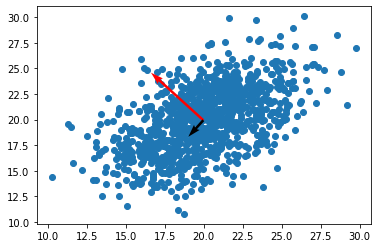

In [167]:
#1d
plt.scatter(td_points[:,0],td_points[:,1])
plt.quiver(*mean_vector, *vectors[:,0],color = 'r',scale = values[0])
plt.quiver(*mean_vector, *vectors[:,1],scale = values[1])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

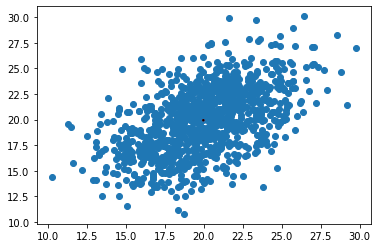

In [180]:
#1d
plt.scatter(td_points[:,0],td_points[:,1])
plt.quiver(*mean_vector, *array_eig_vec[:,0],color = 'r',scale =array_eig_values[0])
plt.quiver(*mean_vector, *array_eig_vec[:,1],scale = array_eig_values[1])
plt.show

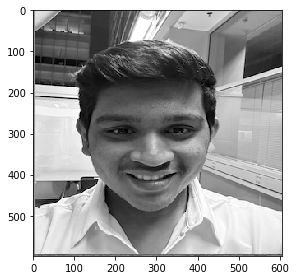

In [84]:
#5c
img_gray = color.rgb2gray(io.imread('Frontal_image.png'))
io.imshow(img_gray)  

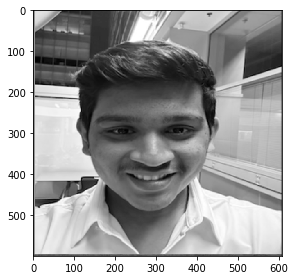

In [85]:
convolve_3 = signal.convolve(img_gray,np.ones((3,3))/3**2)
io.imshow(convolve_3,cmap ='gray')

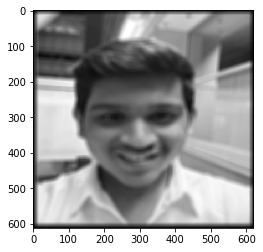

In [86]:
convolve_15 = signal.convolve(img_gray,np.ones((15,15))/15**2)
plt.imshow(convolve_15, cmap = 'gray')

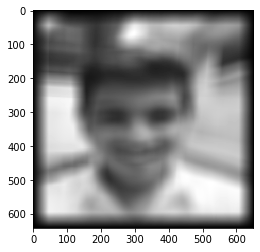

In [87]:
convolve_45 = signal.convolve(img_gray,np.ones((45,45))/45**2)
plt.imshow(convolve_45, cmap = 'gray')